<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/deepfakes_in_politics.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/deepfakes_in_politics.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/deepfakes_in_politics.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/deepfakes_in_politics.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


# Deepfakes in Politics

[Deepfakes](https://arxiv.org/pdf/2004.11138.pdf#page=34&zoom=100,65,305) are images or videos of people that were modified by a deep learning algorithm to fake the actor doing or saying something.

This example follows along with our [blog post about deepfakes in politics](https://medium.com/voxel51/have-deepfakes-influenced-the-2020-election-c0fc890aca0f). We'll load a small number of deepfake videos in [FiftyOne](https://github.com/voxel51/fiftyone) that have been classified by a model deisgned to detect deepfakes and analyze its performance.

Here's a popular example of a deepfake:

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/cQ54GDm1eL0" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Setup

1) Ensure that FiftyOne is installed, [follow these instructions to install.](https://voxel51.com/docs/fiftyone/getting_started/install.html)

2) [Download the dataset containing deepfake videos and labels.](https://drive.google.com/file/d/1t8nAEFOw-khYwbaOLP5IYMq6mbvJY06Y/view?usp=sharing) Then unzip it and set the path below:

In [2]:
# Path to the unzipped dataset you downloaded
DATASET_PATH = "/path/to/deepfakes"

## Load the dataset

In [3]:
import fiftyone as fo

In [4]:
dataset = fo.Dataset.from_dir(DATASET_PATH, dataset_type=fo.types.FiftyOneDataset)

 100% |████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [110.0ms elapsed, 0s remaining, 63.6 samples/s]     


In [5]:
print(dataset)

Name:           2020.11.02.12.17.48
Media type:     video
Num samples:    7
Persistent:     False
Info:           {}
Tags:           ['obama', 'trump']
Sample fields:
    media_type:   fiftyone.core.fields.StringField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    prediction:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    confidence:   fiftyone.core.fields.FloatField
Frame fields:
    frame_number: fiftyone.core.fields.FrameNumberField


## Launch the App and explore

In [6]:
# View dataset in the App
session = fo.launch_app(dataset)

App launched


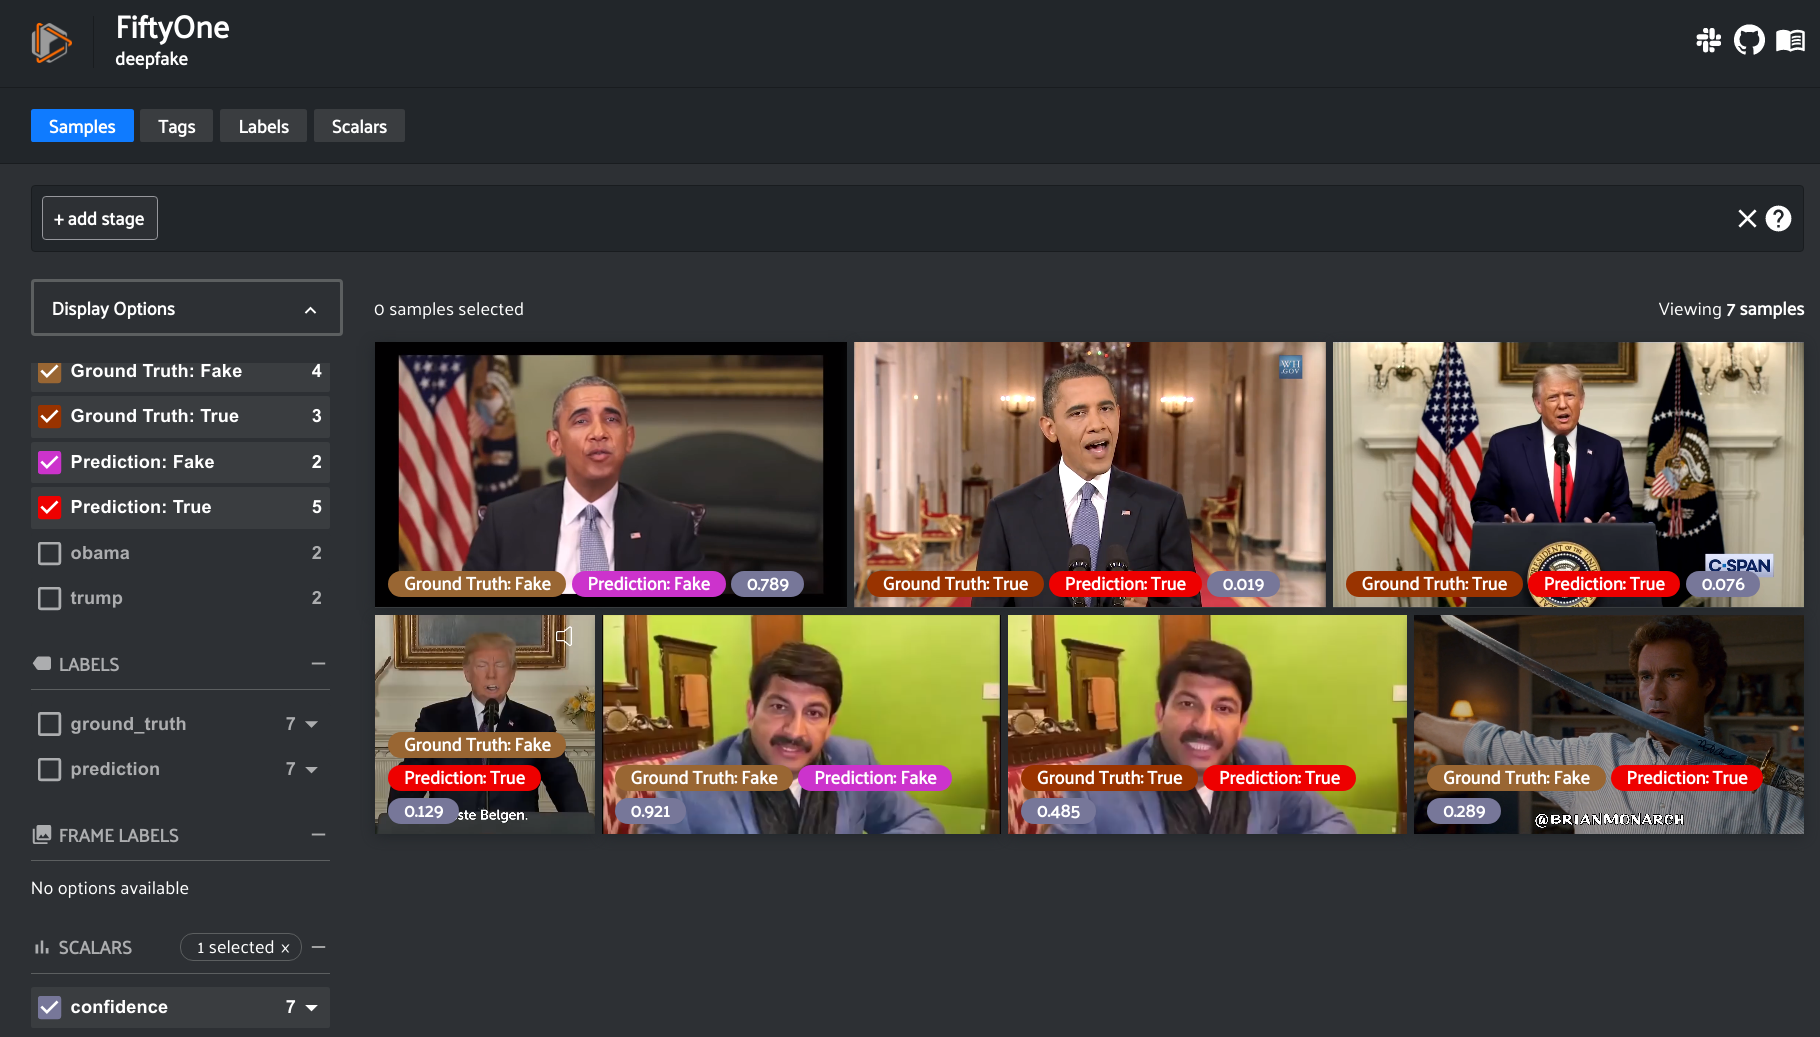

Click on the `confidence` checkbox on the bottom-left of the App to see the confidence of the deepfake detector:

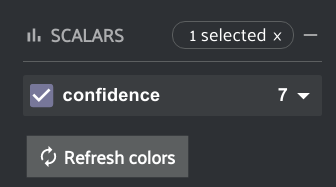

Double click on a video to enlarge it:

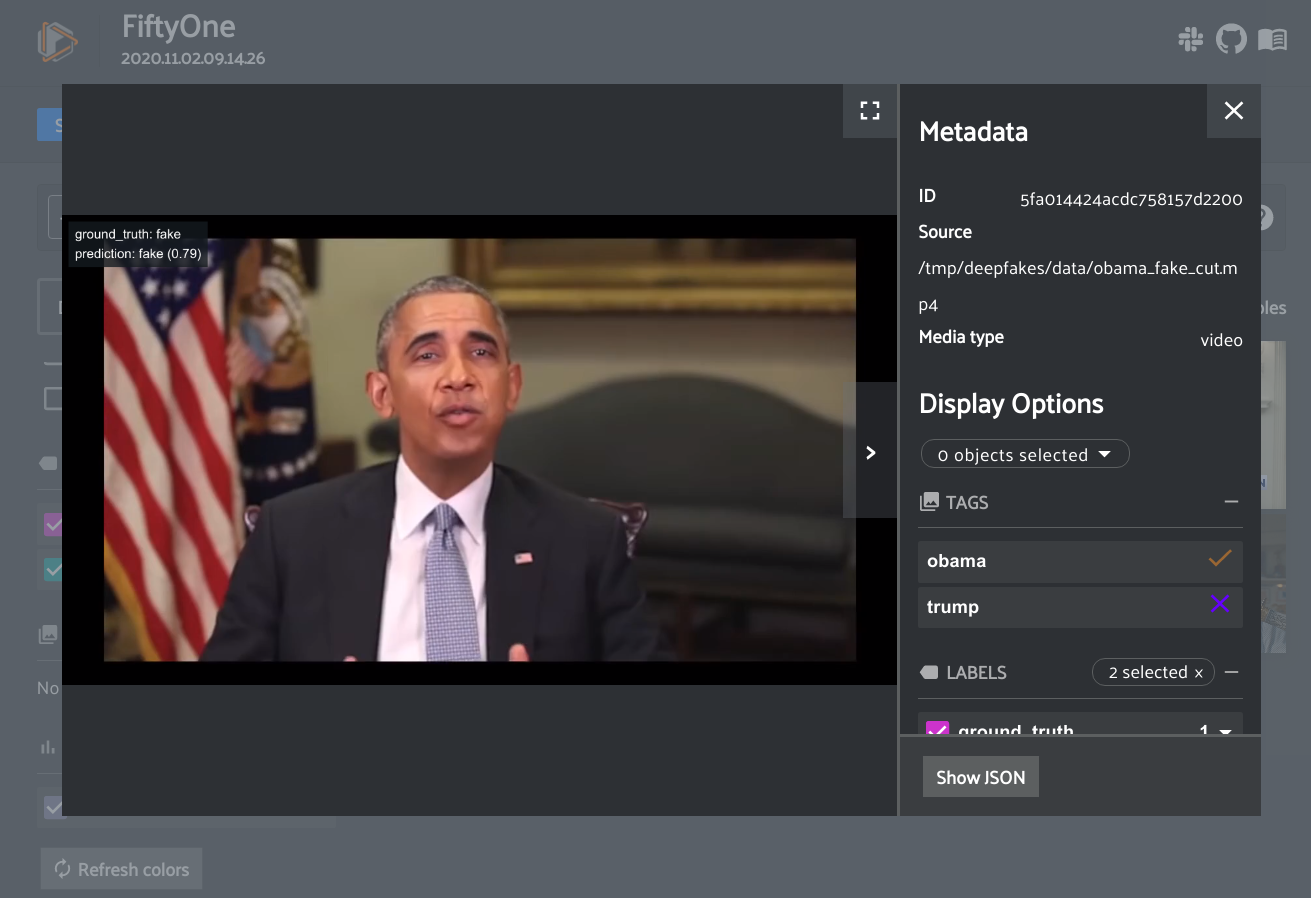

The dataset has tags that show the true identity of some speakers:

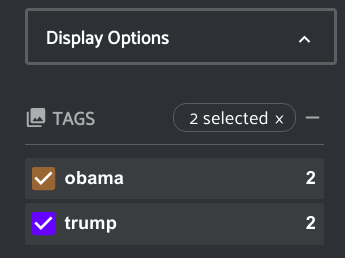

You can use the [view bar](https://voxel51.com/docs/fiftyone/user_guide/app.html#using-the-view-bar) to, for example, show only videos with a certain tag:

In [9]:
# View only Obama videos
session.view = dataset.match_tags("obama")

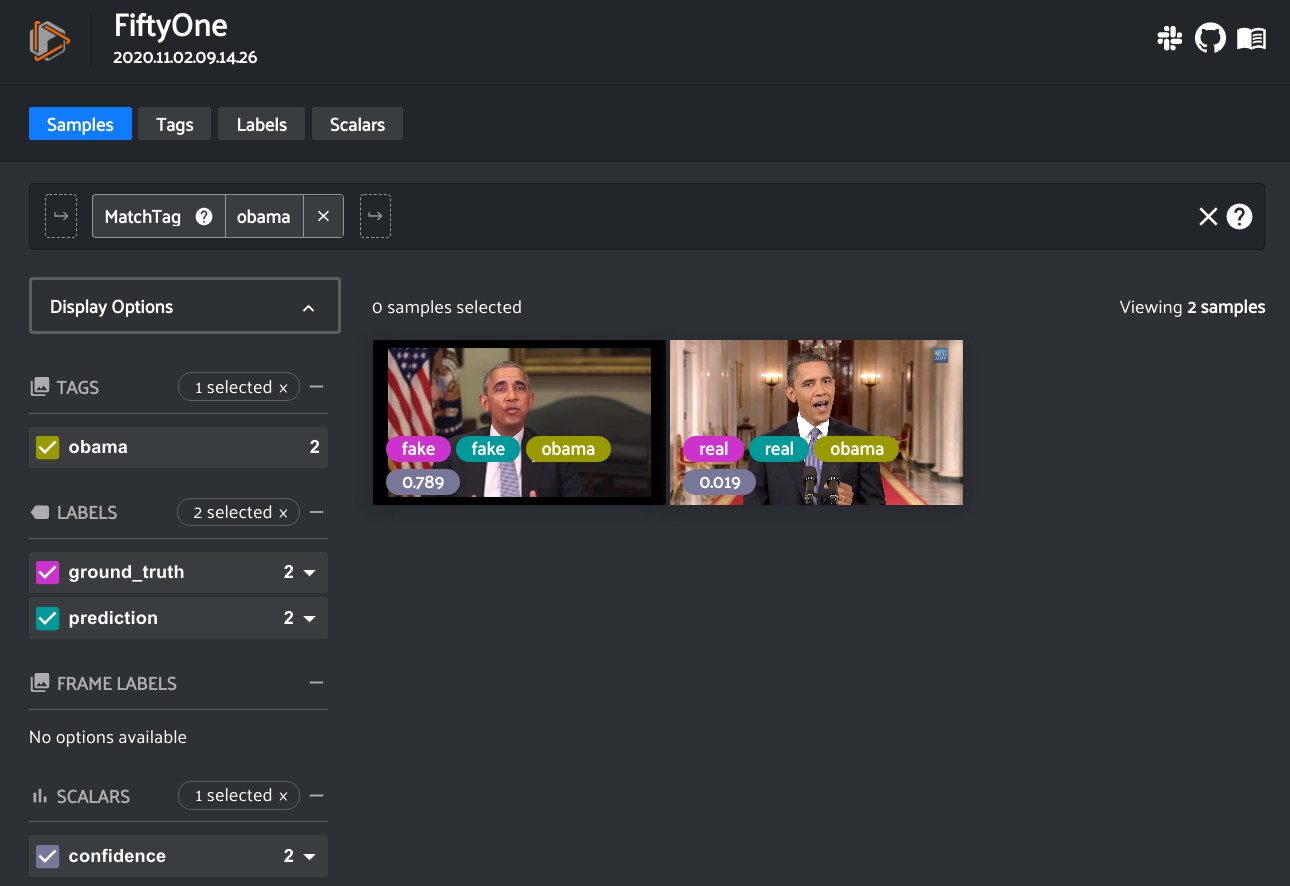